In [ ]:
import pandas as pd

#Задание 1 - Прочитайте датасет Iris.

In [104]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None, names = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'])

In [105]:
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Задание 2 – Посчитайте основные статистики для каждого числового столбца: среднее, минимальное, максимальное значения.

In [106]:
print(df.describe())

       sepalLength  sepalWidth  petalLength  petalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


#Задание 3 - Отсортируйте данные по длине лепестков (колонка PetalLength) в порядке убывания

In [109]:
df_sorted = df.sort_values('petalLength', ascending = False, inplace = True)

In [110]:
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica


#Задание 4 - Постройте гистограммы для всех числовых признаков (длины и ширины чашелистиков и лепестков)

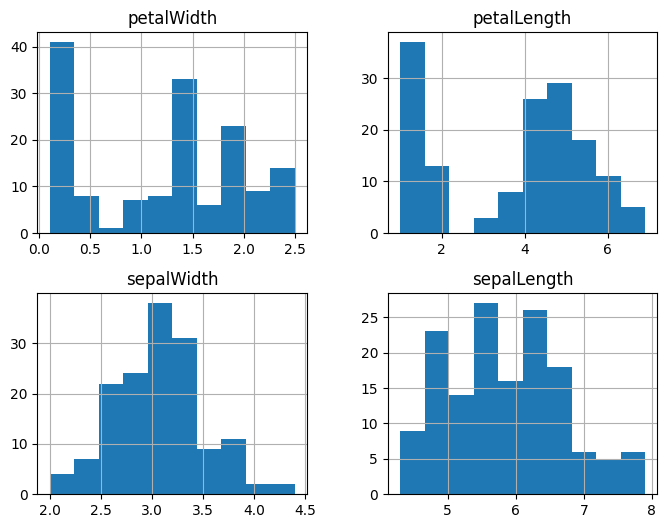

In [111]:
axes = df.hist(['petalWidth', 'petalLength', 'sepalWidth','sepalLength'],bins=10, layout=(2,2), figsize = (8, 6))

#Задание 5 - Отфильтруйте данные, оставив только вид Iris-virginica, и создайте отдельную гистограмму для длины чашелистиков (SepalLength).



In [112]:
df_filtered = df[df['class'] == 'Iris-virginica']

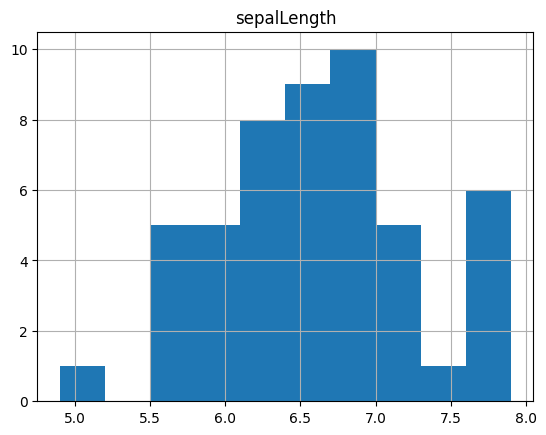

In [113]:
ax = df_filtered.hist(['sepalLength'])

#Задание 6 - Отфильтруйте строки, где длина чашелистиков больше 6.0 и ширина лепестков меньше 1.5.

In [114]:
filtered_df = df[df['sepalLength'] > 6.0][df['petalWidth'] < 1.5]

<ipython-input-114-9513697b444d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[df['sepalLength'] > 6.0][df['petalWidth'] < 1.5]


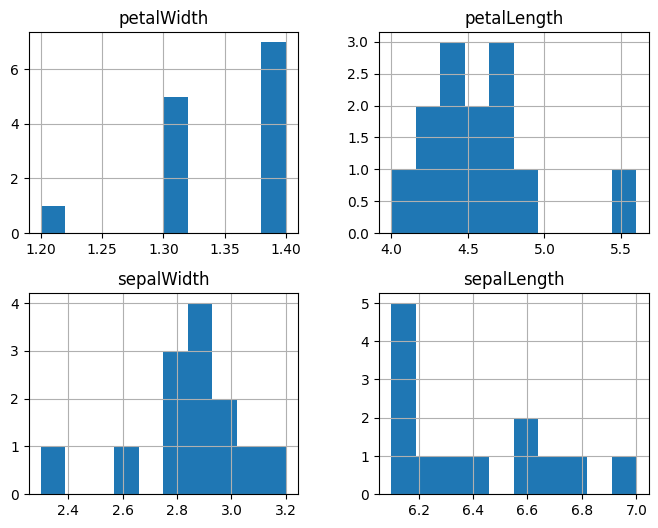

In [115]:
axes = filtered_df.hist(['petalWidth', 'petalLength', 'sepalWidth','sepalLength'],bins=10, layout=(2,2), figsize = (8, 6))

#Задание 7 - Измените форму таблицы так, чтобы для каждого вида ириса был столбец с максимальной и минимальной длиной чашелистиков.

In [116]:
df['petalLengthMax'] = df['class'].apply(lambda x: df.groupby(['class']).max().loc['Iris-setosa', 'petalLength']
                                            if x == 'Iris-setosa' else (df.groupby(['class']).max().loc['Iris-versicolor', 'petalLength'] if x == 'Iris-versicolor'
                                            else df.groupby(['class']).max().loc['Iris-virginica', 'petalLength']))

df['petalLengthMin'] = df['class'].apply(lambda x: df.groupby(['class']).min().loc['Iris-setosa', 'petalLength']
                                            if x == 'Iris-setosa' else (df.groupby(['class']).min().loc['Iris-versicolor', 'petalLength'] if x == 'Iris-versicolor'
                                            else df.groupby(['class']).min().loc['Iris-virginica', 'petalLength']))

In [117]:
df

,sepalLength,sepalWidth,petalLength,petalWidth,class,petalLengthMax,petalLengthMin
118,7.7,2.6,6.9,2.3,Iris-virginica,6.9,4.5
122,7.7,2.8,6.7,2.0,Iris-virginica,6.9,4.5
117,7.7,3.8,6.7,2.2,Iris-virginica,6.9,4.5
105,7.6,3.0,6.6,2.1,Iris-virginica,6.9,4.5
131,7.9,3.8,6.4,2.0,Iris-virginica,6.9,4.5
...,...,...,...,...,...,...,...
36,5.5,3.5,1.3,0.2,Iris-setosa,1.9,1.0
35,5.0,3.2,1.2,0.2,Iris-setosa,1.9,1.0
14,5.8,4.0,1.2,0.2,Iris-setosa,1.9,1.0
13,4.3,3.0,1.1,0.1,Iris-setosa,1.9,1.0
